In [1]:
# Stronger initializer

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

# data preparation
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# model
model = keras.models.Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))

initializer = tf.keras.initializers.he_normal()
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Conv2D(512, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer=initializer))
model.add(keras.layers.MaxPooling2D(2))

# flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu', kernel_initializer=initializer))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_test, y_test), epochs=50)

2022-01-26 14:33:07.080074: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 14:33:07.083751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 14:33:07.084014: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-26 14:33:07.084381: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

2022-01-26 14:33:09.311140: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2022-01-26 14:33:11.084801: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


196/196 [==============================] - 13s 46ms/step - loss: 1.9286 - accuracy: 0.2846 - val_loss: 1.5349 - val_accuracy: 0.4253
Epoch 2/50
196/196 [==============================] - 8s 42ms/step - loss: 1.3415 - accuracy: 0.5064 - val_loss: 1.2095 - val_accuracy: 0.5707
Epoch 3/50
196/196 [==============================] - 8s 42ms/step - loss: 1.0540 - accuracy: 0.6194 - val_loss: 1.0642 - val_accuracy: 0.6213
Epoch 4/50
196/196 [==============================] - 8s 42ms/step - loss: 0.8591 - accuracy: 0.6957 - val_loss: 0.9154 - val_accuracy: 0.6789
Epoch 5/50
196/196 [==============================] - 8s 42ms/step - loss: 0.7140 - accuracy: 0.7502 - val_loss: 0.8371 - val_accuracy: 0.7171
Epoch 6/50
196/196 [==============================] - 8s 42ms/step - loss: 0.5846 - accuracy: 0.7952 - val_loss: 0.7287 - val_accuracy: 0.7537
Epoch 7/50
196/196 [==============================] - 8s 42ms/step - loss: 0.4831 - accuracy: 0.8303 - val_loss: 0.6982 - val_accuracy: 0.7629
Epoch 8/5

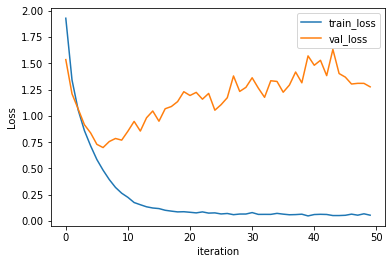

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

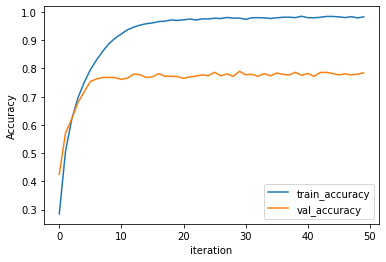

In [3]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label = "train_accuracy")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()